In [1]:
import pandas as pd
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Adjust the file path if needed
outer_zip_path = 'bank+marketing (1).zip'

with zipfile.ZipFile(outer_zip_path) as outer_zip:
    with outer_zip.open('bank.zip') as inner_file:
        inner_bytes = inner_file.read()
        with zipfile.ZipFile(io.BytesIO(inner_bytes)) as inner_zip:
            with inner_zip.open('bank-full.csv') as csv_file:
                df = pd.read_csv(csv_file, sep=';')

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Convert target to binary
y = df['y'].map({'yes': 1, 'no': 0})
X = df.drop(columns=['y'])

# One-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Accuracy: 0.8775848722768993

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



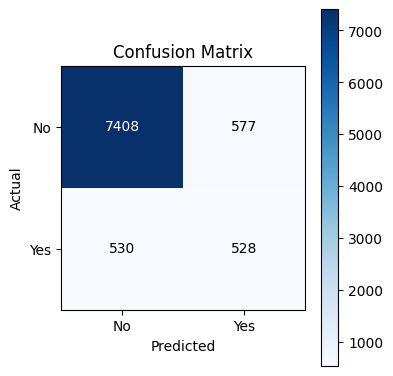

In [5]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])

# Add text inside boxes
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


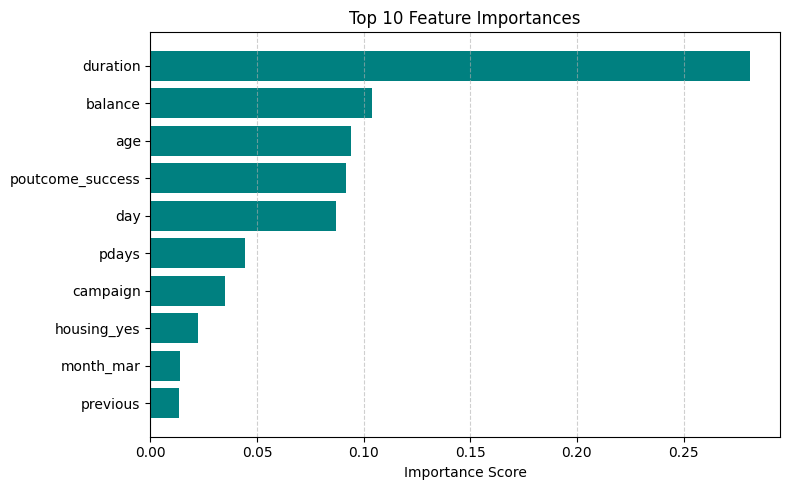

In [6]:
# Feature importance
importances = clf.feature_importances_
features = X_encoded.columns
indices = np.argsort(importances)[-10:]  # Top 10

# Bar plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


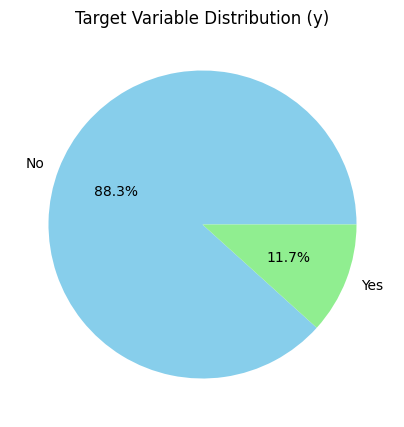

In [7]:
# Pie chart of class distribution
class_counts = y.value_counts()
labels = ['No', 'Yes']

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Target Variable Distribution (y)')
plt.show()


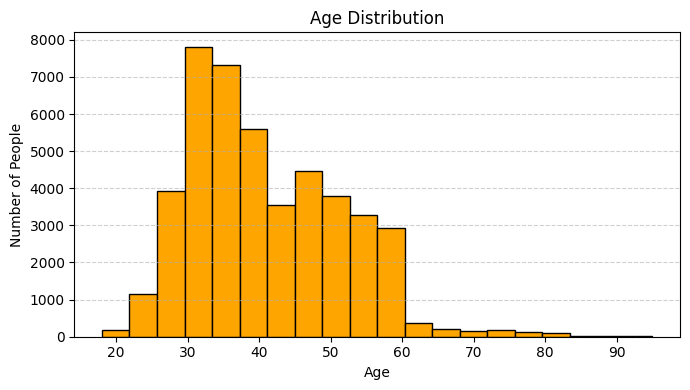

In [8]:
# Histogram for age distribution
plt.figure(figsize=(7, 4))
plt.hist(df['age'], bins=20, color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


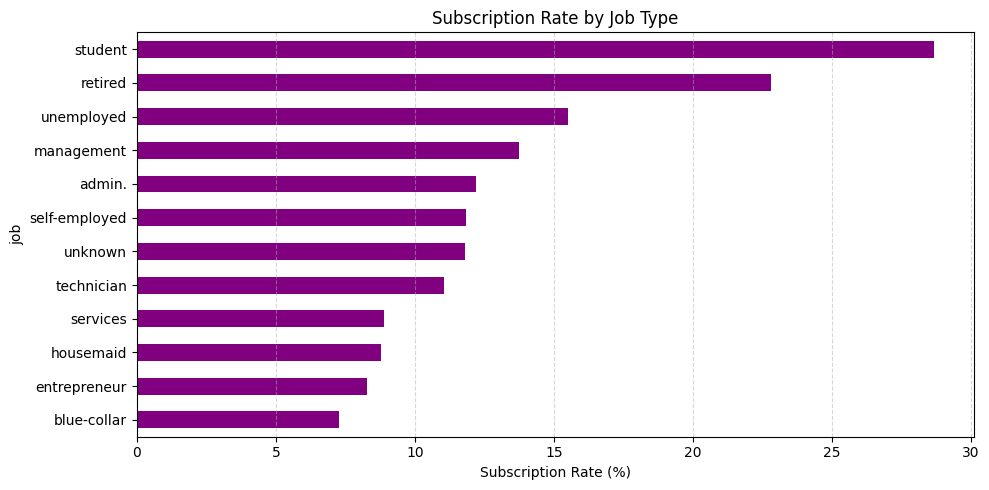

In [9]:
# Percentage of subscription by job
job_data = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100

plt.figure(figsize=(10, 5))
job_data.sort_values().plot(kind='barh', color='purple')
plt.xlabel('Subscription Rate (%)')
plt.title('Subscription Rate by Job Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
